# Figure 3 - TCGA confounding factors

### Setups

In [1]:
set.seed(7)

In [2]:
library(dplyr)
library(ggplot2)
library(ggpubr)
library(ggsci)
library(patchwork)
library(aplot)
library(ggrastr)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [3]:
tcga.colors<-c("#EF9A9A","#F8BBD0","#CE93D8","#B39DDB","#9FA8DA",
               "#90CAF9","#81D4FA","#80DEEA","#80CBC4","#A5D6A7",
               "#C5E1A5","#E6EE9C","#FFF59D","#FFE082","#BCAAA4",
               "#F44336","#E91E63","#9C27B0","#673AB7","#3F51B5",
               "#2196F3","#03A9F4","#00BCD4","#009688","#4CAF50",
               "#8BC34A","#CDDC39","#FFC107","#FF9800","#795548",
               "#B71C1C")
col.pal <- colorRampPalette(colors = c("blue","white","red"))

In [4]:
plot_confounder_embedding<-function(anot.embed,...){
    
    col.pal <- colorRampPalette(colors = c( "#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"))
    
    colnames(anot.embed)<-gsub("_.*","",colnames(anot.embed))
    
    p1<-anot.embed %>%
        ggplot(.,aes(x=PC1,y=PC2,color=impurity))+
        rasterise(geom_point(size=1.25,na.rm=TRUE),dpi=300)+
        theme_pubr()+
        scale_color_gradientn(colours = col.pal(10))+
        theme(legend.position="right")
    
    p2<-anot.embed %>%
        ggplot(.,aes(x=PC1,y=PC3,color=impurity))+
        rasterise(geom_point(size=1.25,na.rm=TRUE),dpi=300)+
            theme_pubr()+
            scale_color_gradientn(colours = col.pal(10))+
            theme(legend.position="right")
    
    return(list(p1,p2))
}

### Load data

In [5]:
metadata<-fread(file="input/tcga.metadata.tsv")
spl_embed<-fread(file="input/tcga.spl_embed.tsv")
gene_embed<-fread(file="input/tcga.gene_embed.tsv")
pca.var.cor<-fread(file="input/tcga.pc.impurity.correlations.tsv")
spl_embed_kirc<-fread(file="input/kirc.spl_embed.tsv")
gene_embed_kirc<-fread(file="input/kirc.gene_embed.tsv")

## Full dataset embeddings

### Expression

In [6]:
gem<-left_join(metadata,gene_embed,by = "submitter_id") 

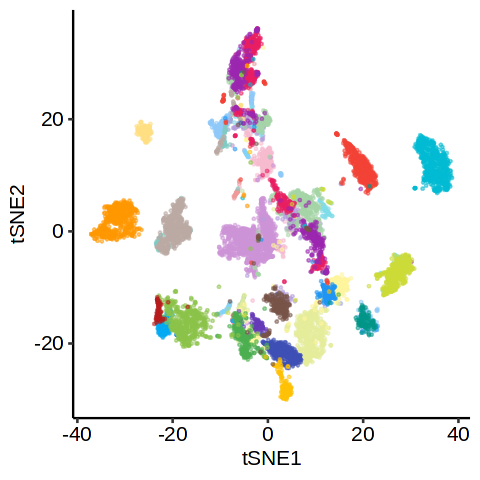

In [7]:
options(repr.plot.height=4,repr.plot.width=4)
p1<-ggplot(gem,aes(x=tSNE1_exp,y=tSNE2_exp,color=cancer))+
        rasterise(geom_point(size=0.5,alpha=0.5),dpi=300)+
        theme_pubr()+
        theme(legend.position="none")+
        scale_color_manual(values=tcga.colors)+
        labs(x="tSNE1",y="tSNE2")
ggsave(p1,filename="output/tcga.gex.tSNE.embeding.cancerType.pdf",device="pdf",height = 4,width=4,units="in")
p1

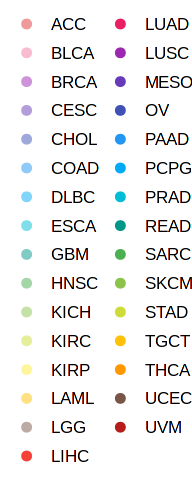

In [8]:
options(repr.plot.height=4,repr.plot.width=1.6)
p1<-ggplot(gem,aes(x=tSNE1_exp,y=tSNE2_exp,color=cancer))+
    geom_point(size=2)+
    theme_pubr()+
    theme(legend.position="top")+
    scale_color_manual(values=tcga.colors)+
    guides(color=guide_legend(ncol=2))+
    labs(color="")
l<-as_ggplot(get_legend(p1))
ggsave(l,filename="output/tcga.gex.tSNE.embeding.cancerType.legend.long.pdf",device="pdf",height = 4,width=1.6,units="in")
l

### Splicing

In [9]:
splem<-left_join(metadata,spl_embed,by = "submitter_id") 

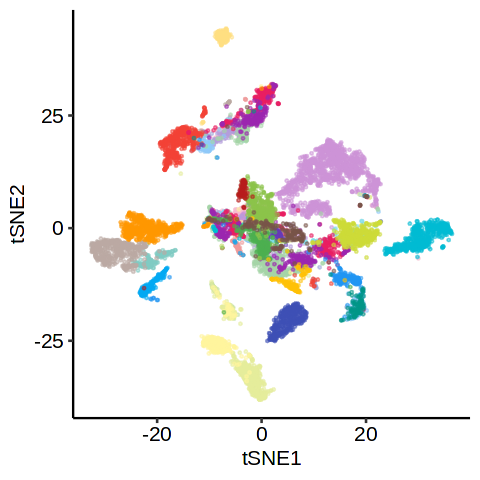

In [10]:
options(repr.plot.height=4,repr.plot.width=4)
p1<-ggplot(splem,aes(x=tSNE1_spl,y=tSNE2_spl,color=cancer))+
        rasterise(geom_point(size=0.5,alpha=0.5),dpi=300)+
        theme_pubr()+
        theme(legend.position="none")+
        scale_color_manual(values=tcga.colors)+
        labs(x="tSNE1",y="tSNE2")
ggsave(p1,filename="output/tcga.spl.tSNE.embeding.cancerType.pdf",device="pdf",height = 4,width=4,units="in")
p1

## KIRC embeddings

In [11]:
metadata<-metadata %>% filter(condition=="tumor")

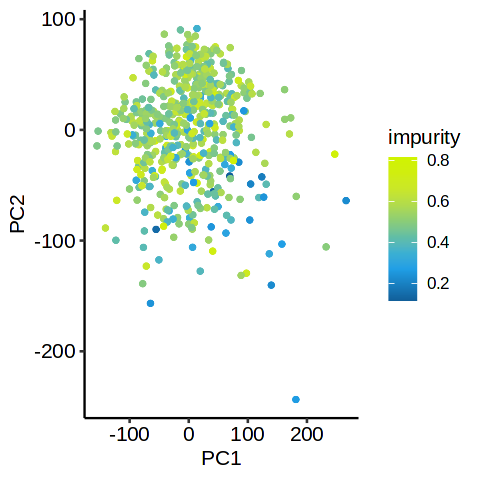

In [12]:
# Gene expression embedding plots 
cgem<-inner_join(metadata,gene_embed_kirc,by = "submitter_id") %>%
      filter(condition=="tumor")

plots<-plot_confounder_embedding(cgem)

ggsave(plots[[1]],filename=paste0("output/KIRC.PC1_2.gex.pdf"),device = "pdf",width = 5,height = 4)
ggsave(plots[[2]],filename=paste0("output/KIRC.PC1_3.gex.pdf"),device = "pdf",width = 5,height = 4)

print(plots[[1]])

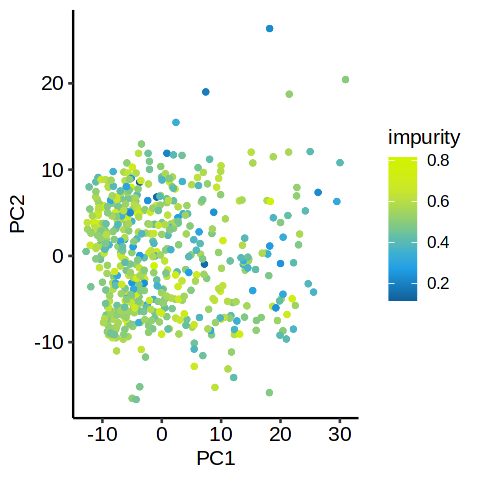

In [13]:
# SE splicing embedding plots 
csem<-inner_join(metadata,spl_embed_kirc,by = "submitter_id") %>%
      filter(condition=="tumor") 

plots<-plot_confounder_embedding(csem)

ggsave(plots[[1]],filename=paste0("output/KIRC.PC1_2.spl.pdf"),device = "pdf",width = 5,height = 4)
ggsave(plots[[2]],filename=paste0("output/KIRC.PC1_3.spl.pdf"),device = "pdf",width = 5,height = 4)

print(plots[[1]])

## Correlations 

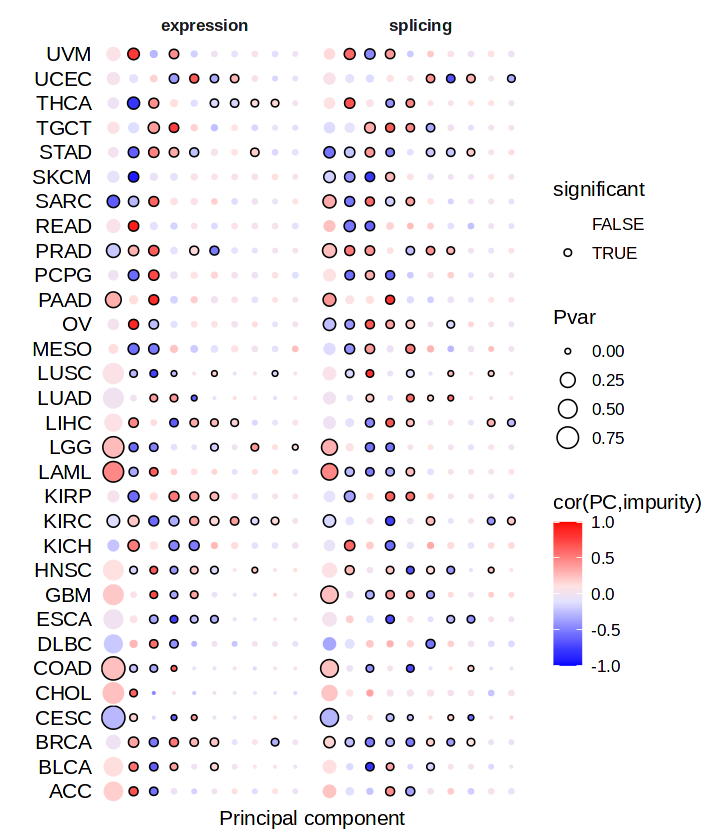

In [14]:
options(repr.plot.width=6,repr.plot.height=7)
p<-ggplot(pca.var.cor,aes(y=cancer,x=PC,fill=pcor_impurity,color=significant,size=Pvar))+
    geom_point(pch=21)+
    scale_color_manual(values=c("white","black"))+
    scale_x_discrete(position = "bottom")+
    theme_pubr()+
    theme(axis.line = element_blank(),
         axis.ticks = element_blank(),
         legend.position="right",
         strip.background = element_blank(),
         strip.text = element_text(face="bold"))+
    scale_fill_gradientn(colours = col.pal(10),limits=c(-1,1))+
    facet_wrap(~mode)+
    labs(x="Principal component",y="",fill="cor(PC,impurity)")
ggsave(p,filename= "output/tcga.PCimpurityCorrelations.pdf",device="pdf",width=6,height=7,units="in")
p